In [2]:
import xgboost as xgb

print(xgb.__version__)

2.1.0


---
유방암 예측

---

In [3]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer() # 딕셔너리 형태 저장
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [4]:
# target 분포 확인
print(dataset.target_names)
# ['malignant': 0 -> 악성   'benign': 1 -> 양성]
print(cancer_df['target'].value_counts()) # 레이블의 분포 확인
# 불균형하다

['malignant' 'benign']
target
1    357
0    212
Name: count, dtype: int64


In [5]:
# 데이터프레임에서 데이터와 레이블(답) -> 마지막 컬럼 분리
X_features = cancer_df.iloc[:, :-1] # 데이터 추출
y_label = cancer_df.iloc[:, -1] # 레이블 추출

# 전체 데이터에서 학습데이터 테스트 데이터 분리 => 8:2
X_train, X_test, y_train, y_test = train_test_split(
      X_features
    , y_label
    , test_size=0.2
    , random_state=156
)

# 위 학습 데이터에서 90% 학습데이터 10% 검증데이터 분리
X_tr, X_val, y_tr, y_val = train_test_split(
      X_train
    , y_train
    , test_size=0.1
    , random_state=156
)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [6]:
# 파이썬 기반 XGBoost 사용 : ndarray 바로 사용 안됨 => DMatrix() 변환
# 1. 학습데이터와 레이블
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
# 2. 검증데이터와 레이블
dval = xgb.DMatrix(data=X_val, label=y_val)
# 3. 테스트데이터와 레이블
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [12]:
params = { 'max_depth':3,                   # 딕셔너리로 파라미터 설정
          'eta': 0.01,                      # 학습률
          'objective':'binary:logistic',    # 이진분류
          'eval_metric':'logloss'           # 평가지표 : 로그오차
         }
num_rounds = 1000                            # 트리 갯수

In [13]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval' 로 명기합니다. 
eval_list = [(dtr,'train'),(dval,'eval')] # 또는 eval_list = [(dval,'eval')] 만 명기해도 무방. 

# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds , \
                      early_stopping_rounds=50, evals=eval_list )

[0]	train-logloss:0.65845	eval-logloss:0.65365
[1]	train-logloss:0.65001	eval-logloss:0.64781
[2]	train-logloss:0.64174	eval-logloss:0.64234
[3]	train-logloss:0.63364	eval-logloss:0.63698
[4]	train-logloss:0.62570	eval-logloss:0.63149
[5]	train-logloss:0.61792	eval-logloss:0.62635
[6]	train-logloss:0.61029	eval-logloss:0.62132
[7]	train-logloss:0.60281	eval-logloss:0.61615
[8]	train-logloss:0.59548	eval-logloss:0.61133
[9]	train-logloss:0.58828	eval-logloss:0.60636
[10]	train-logloss:0.58122	eval-logloss:0.60172
[11]	train-logloss:0.57429	eval-logloss:0.59718
[12]	train-logloss:0.56748	eval-logloss:0.59264
[13]	train-logloss:0.56081	eval-logloss:0.58803
[14]	train-logloss:0.55425	eval-logloss:0.58375
[15]	train-logloss:0.54781	eval-logloss:0.57955
[16]	train-logloss:0.54148	eval-logloss:0.57550
[17]	train-logloss:0.53527	eval-logloss:0.57122
[18]	train-logloss:0.52916	eval-logloss:0.56732
[19]	train-logloss:0.52316	eval-logloss:0.56343
[20]	train-logloss:0.51722	eval-logloss:0.55919
[2

In [15]:
# 성능평가 => 테스트데이터
# 분류모델 : 예측값 => 원래답 비교
pred_probs = xgb_model.predict(dtest) # 확률이 표시된다
print(np.round(pred_probs[:10], 3)) # 예측값 10개 추출, 3번째 자리 반올림
# 예측 확률이 0.5보다 크면 1로 예측, 작으면 0으로 예측
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print(preds[:10]) # 예측값 10개를 출력

[0.889 0.01  0.749 0.078 0.966 0.997 0.996 0.995 0.994 0.003]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [16]:
# 불균형 데이터 셋
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [17]:
# y_test : 원래답, preds : 예측값, pred_probs : 예측확률
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740,    F1: 0.9740, AUC:0.9961


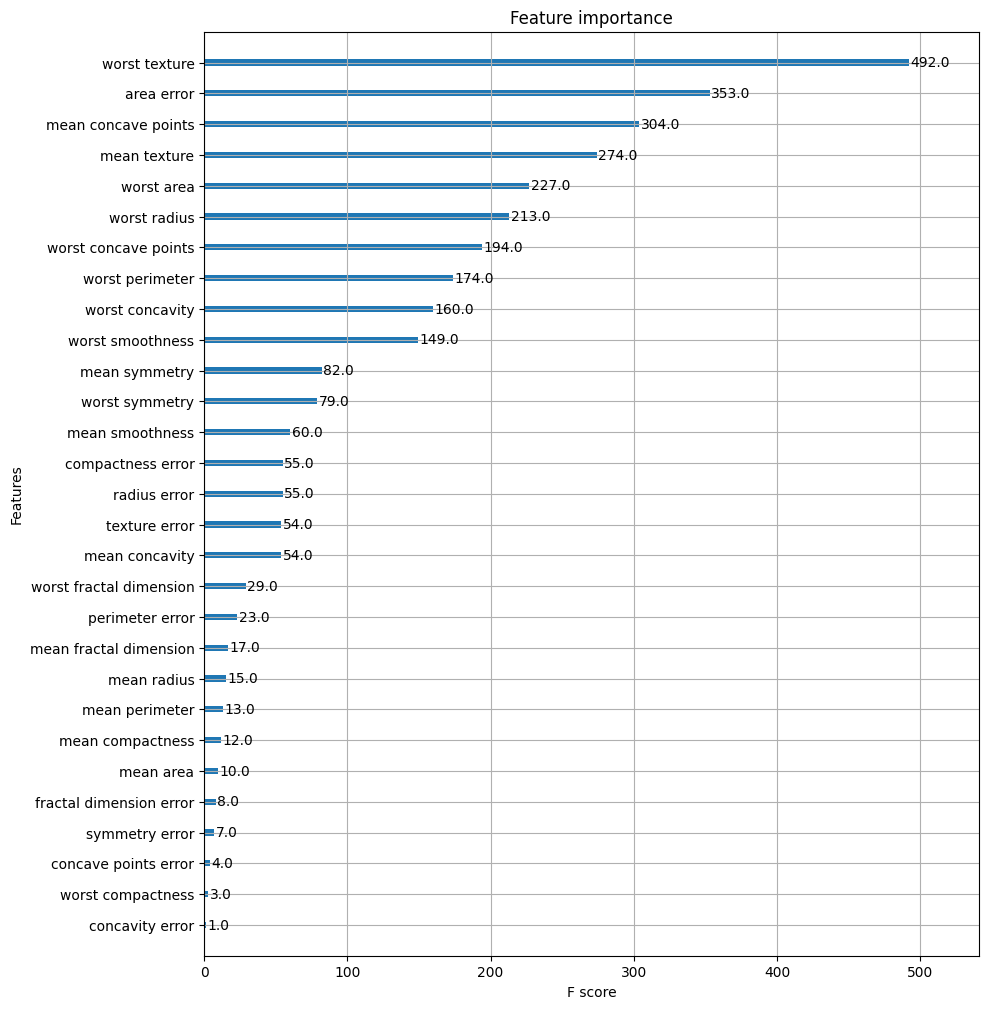

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
plt.savefig('p239_xgb_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

### 사이킷런 기반 xgboost

In [19]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train) # 학습 진행
w_preds = xgb_wrapper.predict(X_test) # 예측값
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1] # 예측확률

get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9947


In [34]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(
    n_estimators=400
    , early_stopping_rounds=10 # 100 => 정확도 : 0.9649, 10 => 정확도 : 0.9561
    , eval_metric="logloss"
    , learning_rate=0.1, max_depth=3
)
evals = [(X_test, y_test)] # 테스트데이터와 레이블
xgb_wrapper.fit(X_train, y_train, eval_set=evals, verbose=False)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

get_clf_eval(y_test,ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9954
